In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.preprocessing.image import ImageDataGenerator
import os
import shutil

from PIL import Image
from keras.applications import ResNet50
from keras.layers import Input

Using TensorFlow backend.


In [2]:
from keras import models, layers
from keras import Input
from keras.models import Model, load_model
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers, initializers, regularizers, metrics
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import BatchNormalization, Conv2D, Activation, Dense, GlobalAveragePooling2D, MaxPooling2D, ZeroPadding2D, Add, Flatten

In [3]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [4]:
data_generator = ImageDataGenerator(rescale=1./255,
                                   validation_split=0.2)

train_generator = data_generator.flow_from_directory(
    'data/train',
    target_size = (224, 224),
    batch_size = 128,
    class_mode = 'categorical',
    subset="training"
)

valid_generator = data_generator.flow_from_directory(
    'data/train',
    target_size = (224, 224),
    batch_size = 128,
    class_mode = 'categorical',
    subset="validation"
)


Found 96379 images belonging to 150 classes.
Found 24046 images belonging to 150 classes.


In [5]:
test_generator = data_generator.flow_from_directory(
    'data/test',
    target_size = (224, 224),
    batch_size = 128,
    class_mode = 'categorical'
)

Found 30088 images belonging to 150 classes.


In [8]:
pth = "{epoch:02d}.h5"

cp = ModelCheckpoint(
    pth,
    save_weights_only=False,
    mode = 'auto',
)

model = ResNet50(weights=None, classes=150, input_shape=(224, 224, 3))

model.compile(loss = 'categorical_crossentropy',
                optimizer = 'adam',
                metrics=['accuracy'])

In [10]:
hist = model.fit(
    train_generator,
    validation_data = valid_generator,
    steps_per_epoch = 96379/128,
    epochs = 20,
    callbacks=[cp]
)

Epoch 1/20
160/752 [=====>........................] - ETA: 31:22 - loss: 4.6403 - accuracy: 0.0417

/opt/conda/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:793: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 4. 
  warnings.warn(str(msg))


261/752 [=========>....................] - ETA: 26:12 - loss: 4.4649 - accuracy: 0.0529

/opt/conda/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:772: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 2. Skipping tag 41486
  "Possibly corrupt EXIF data.  "
/opt/conda/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:772: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 41487
  "Possibly corrupt EXIF data.  "


472/752 [=================>............] - ETA: 14:54 - loss: 4.2123 - accuracy: 0.0784

/opt/conda/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:772: UserWarning: Possibly corrupt EXIF data.  Expecting to read 20 bytes but only got 6. Skipping tag 272
  "Possibly corrupt EXIF data.  "


524/752 [===================>..........] - ETA: 12:05 - loss: 4.1591 - accuracy: 0.0847

/opt/conda/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:772: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1078 bytes but only got 0. Skipping tag 37500
  "Possibly corrupt EXIF data.  "


753/752 [==============================] - ETA: 0s - loss: 3.9465 - accuracy: 0.1124

/opt/conda/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:772: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 2. Skipping tag 37386
  "Possibly corrupt EXIF data.  "
/opt/conda/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:772: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 37396
  "Possibly corrupt EXIF data.  "


752/752 [==============================] - 3124s 4s/step - loss: 3.9465 - accuracy: 0.1124 - val_loss: 5.0338 - val_accuracy: 0.0534
Epoch 2/20
752/752 [==============================] - 852s 1s/step - loss: 2.8951 - accuracy: 0.2752 - val_loss: 3.7173 - val_accuracy: 0.1772
Epoch 3/20
752/752 [==============================] - 847s 1s/step - loss: 2.3032 - accuracy: 0.3924 - val_loss: 3.7584 - val_accuracy: 0.2340
Epoch 4/20
752/752 [==============================] - 846s 1s/step - loss: 1.8790 - accuracy: 0.4917 - val_loss: 2.2213 - val_accuracy: 0.4249
Epoch 5/20
752/752 [==============================] - 848s 1s/step - loss: 1.5638 - accuracy: 0.5648 - val_loss: 2.2991 - val_accuracy: 0.4239
Epoch 6/20
752/752 [==============================] - 845s 1s/step - loss: 1.3200 - accuracy: 0.6257 - val_loss: 2.4111 - val_accuracy: 0.4194
Epoch 7/20
752/752 [==============================] - 846s 1s/step - loss: 1.1206 - accuracy: 0.6744 - val_loss: 2.2660 - val_accuracy: 0.4578
Epoch 8/2

In [13]:
import pickle

with open('resnet50_train_his1_di', 'wb') as f:
    pickle.dump(hist.history, f)

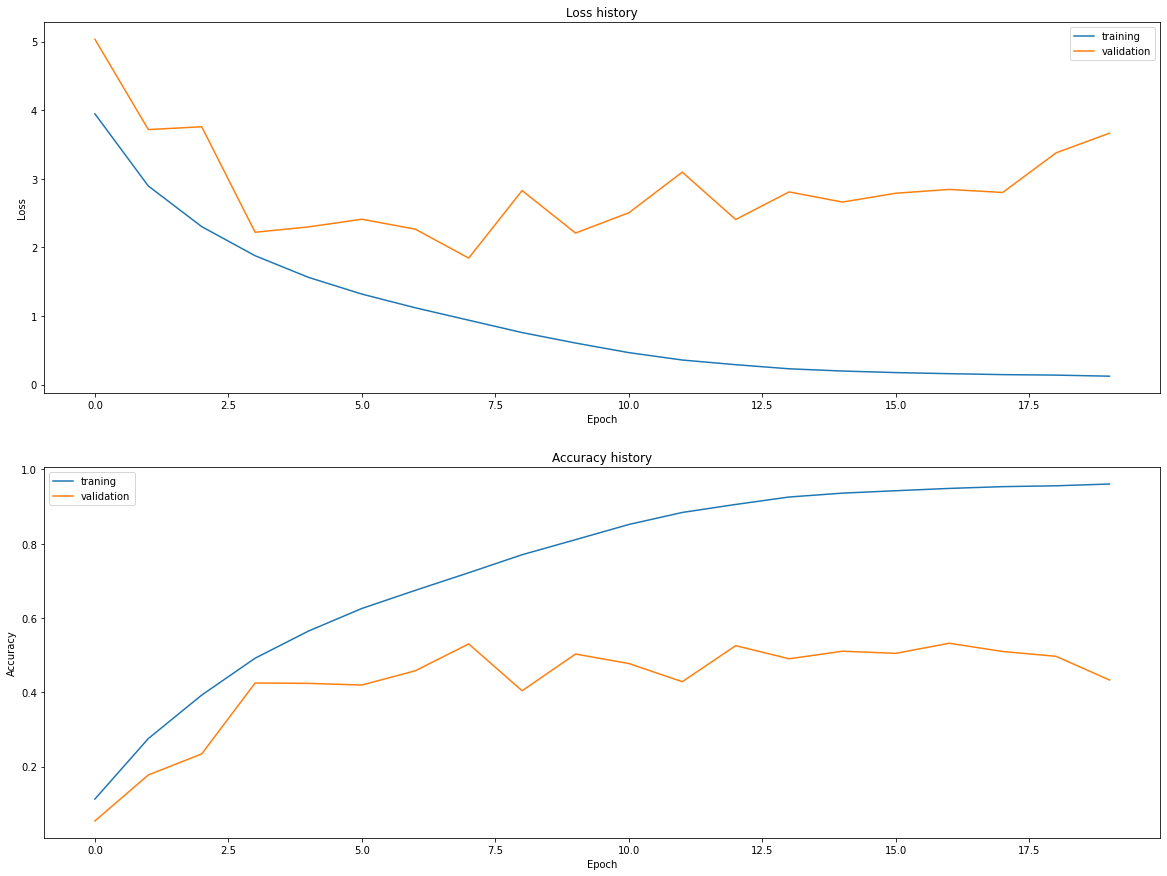

In [49]:
import matplotlib.pyplot as plt

fig1, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 15))

ax1.set_title('Loss history')

ax1.plot(hist.history['loss'])
ax1.plot(hist.history['val_loss'])

ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')

ax1.legend(['training', 'validation'])


ax2.set_title('Accuracy history')

ax2.plot(hist.history['accuracy'])
ax2.plot(hist.history['val_accuracy'])

ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')

ax2.legend(['traning', 'validation'])





plt.show()

In [51]:
ev = model.evaluate(test_generator)

236/236 [==============================] - 207s 874ms/step - loss: 3.5503 - accuracy: 0.4418


In [100]:
tx, ty = test_generator.next()
tem = np.expand_dims(tx[0], axis=0)
tem.shape
res = model.predict(tem)

In [101]:
res

array([[8.83964724e-09, 2.32818127e-12, 6.46092013e-10, 4.03046260e-12,
        7.57184204e-10, 5.78196399e-13, 6.76699568e-14, 6.67791369e-07,
        1.64019931e-09, 2.27606517e-10, 3.77550124e-09, 4.09199931e-11,
        1.55944133e-10, 5.86986737e-10, 3.52196056e-13, 1.87964777e-09,
        1.05102571e-09, 3.05506731e-10, 4.35822323e-10, 9.91709210e-13,
        9.15764645e-07, 2.72745188e-10, 1.18749606e-08, 7.52776921e-12,
        3.97069311e-09, 1.47850107e-10, 1.08295796e-10, 2.32212671e-09,
        9.29531244e-11, 8.04072975e-10, 1.30689039e-13, 5.85827122e-13,
        4.13841433e-13, 6.09305118e-07, 3.60076552e-10, 4.66684989e-11,
        4.05481387e-06, 7.25259826e-12, 8.74416598e-12, 6.00075267e-10,
        8.48762141e-13, 4.79236095e-11, 1.69962438e-12, 2.36852031e-11,
        1.00617348e-10, 6.82326515e-08, 6.42428262e-08, 2.91615851e-08,
        2.92468516e-09, 1.45376931e-11, 5.68557944e-11, 6.88519658e-11,
        1.86069347e-08, 7.53016085e-14, 9.19697385e-08, 1.479689

In [104]:
img = Image.open("knm.jpg")

In [108]:
img_resized = img.resize((224, 224))
# img_resized.show()
img_arr = np.asarray(img_resized).astype(np.float32)/255

inp = np.expand_dims(img_arr, axis=0)
inp.shape

(1, 224, 224, 3)

In [110]:
res = model.predict(inp)
res.argmax()

135